In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

In [2]:
abcd_mri = pd.read_csv("/data5/open_data/ABCD/ABCDstudyDEAP/abcd_mri01.txt",sep='\t')
abcd_mri.set_index("subjectkey",drop=True,inplace=True)

In [3]:
abcd_mri['mri_info_manufacturer'].value_counts()

SIEMENS                        7280
GE MEDICAL SYSTEMS             2962
Philips Medical Systems        1513
Imaging device manufacturer       1
Name: mri_info_manufacturer, dtype: int64

In [4]:
#Factor scores
fs_df = pd.read_csv("/data4/SNU/data/ABCD_SNUH_CFA_p.csv",sep='\t')
fs_df.set_index("subjectkey",drop=True,inplace=True)

fs_df

,ext,int,neu,som,det,p
subjectkey,,,,,,
NDAR_INV003RTV85,-0.682,-0.537,-0.424,-0.522,0.076,-0.403
NDAR_INV005V6D2C,-0.872,-0.537,-0.830,-0.675,-0.738,-0.695
NDAR_INV007W6H7B,0.023,0.575,0.506,1.166,0.550,0.432
NDAR_INV00BD7VDC,0.133,0.443,0.458,-0.212,0.061,0.264
NDAR_INV00J52GPG,-0.028,-0.316,0.118,-0.361,-0.198,-0.070
...,...,...,...,...,...,...
C53,-0.777,-0.647,-0.482,-0.600,-0.610,-0.554
C54,0.634,0.130,0.167,-0.244,0.006,0.190
C55,-0.416,-0.339,-0.571,-0.514,-0.082,-0.387


In [5]:
#ABCD
data_path = "/users/hjw/data/ABCD/npz_files/rsfc_p_site_scanner_si_ge.npz"
abcd_p = np.load(data_path, allow_pickle=True)["y"][:,0]
abcd_sbj = np.load("/users/hjw/data/ABCD/npz_files/sbj_keys.npz",allow_pickle=True)['X']

abcd_sbj_list = ["NDAR_"+i for i in abcd_sbj]

print(abcd_p.shape, abcd_sbj.shape)

(6905,) (6905,)


In [192]:
#ABCD- scanner info
for i in abcd_sbj_list:
    fs_df.loc[i,'scanner'] = 1 if "SIEMENS" in abcd_mri.loc[i,'mri_info_manufacturer'] else 0
#SNUH- mdd/control info
for i in snuh_sbj_list:
    fs_df.loc[i,'scanner'] = 1 if 'P' in i else 0

In [7]:
#SNUH
snuh = pd.read_csv("/data4/SNU/data/demo_for_rsfc_df.csv", index_col=0)
snuh_sbj = snuh['new_id'].tolist()
snuh_sbj_list = [i[0]+str(int(i[1:])) for i in snuh_sbj]

In [8]:
#ABCD
abcd_p = fs_df.loc[abcd_sbj_list,'p'].values
abcd_ext = fs_df.loc[abcd_sbj_list,'ext'].values
abcd_int = fs_df.loc[abcd_sbj_list,'int'].values
abcd_neu = fs_df.loc[abcd_sbj_list,'neu'].values
abcd_som = fs_df.loc[abcd_sbj_list,'som'].values
abcd_det = fs_df.loc[abcd_sbj_list,'det'].values
abcd_scanner = fs_df.loc[abcd_sbj_list,'scanner'].values

In [211]:
abcd_melt = fs_df.loc[abcd_sbj_list,:].melt(id_vars=['scanner'])
snuh_melt = fs_df.loc[snuh_sbj_list,:].melt(id_vars=['scanner'])
abcd_melt['data']='ABCD'
# snuh_melt['data']='SNUH'

for i in range(len(snuh_melt)):
    if snuh_melt.loc[i,'scanner']==0:
        snuh_melt.loc[i,'data'] = "SNUH_HC"
    else:
        snuh_melt.loc[i,'data'] = "SNUH_MDD"
fs_df_melt = pd.concat([abcd_melt,snuh_melt])

In [206]:
for i in range(len(snuh_melt)):
    if snuh_melt.loc[i,'scanner']==0:
        snuh_melt.loc[i,'data'] = "SNUH_HC"
    else:
        snuh_melt.loc[i,'data'] = "SNUH_MDD"

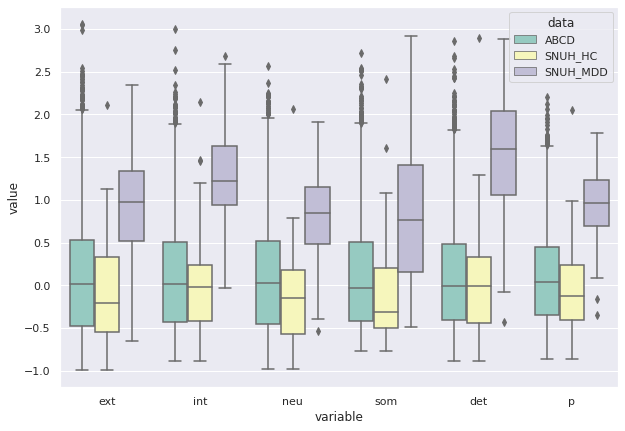

In [212]:
sns.set(style='darkgrid',palette='Set3')
plt.figure(figsize=(10,7))
sns.boxplot(x='variable',y='value',data=fs_df_melt,hue='data')
plt.show()
# sns.violinplot(x='variable',y='value',data=fs_df_melt,hue='data',split=True)

In [9]:
np.unique(abcd_scanner,return_counts=True)

(array([0., 1.]), array([1830, 5075]))

In [32]:
snuh_p = fs_df.loc[snuh_sbj_list,'p'].values
snuh_ext = fs_df.loc[snuh_sbj_list,'ext'].values
snuh_int = fs_df.loc[snuh_sbj_list,'int'].values
snuh_neu = fs_df.loc[snuh_sbj_list,'neu'].values
snuh_som = fs_df.loc[snuh_sbj_list,'som'].values
snuh_det = fs_df.loc[snuh_sbj_list,'det'].values

In [11]:
np.savez("/data4/SNU/data/ABCD_CFA_5factor.npz",p=abcd_p,ext=abcd_ext,int=abcd_int,neu = abcd_neu, som = abcd_som, det= abcd_det,scn=abcd_scanner)

In [12]:
np.savez("/data4/SNU/data/SNUH_CFA_5factor.npz",p=snuh_p,ext=snuh_ext,int=snuh_int,neu = snuh_neu, som = snuh_som, det= snuh_det)

In [38]:
a = np.load("/data4/SNU/data/ABCD_CFA_5factor.npz",allow_pickle=True)
for i in a:
    print(i)

p
ext
int
neu
som
det
scn


## regressing out

In [71]:
from sklearn import linear_model

In [76]:
x.reshape(-1,1)

array([-0.403,  0.264, -0.183, ...,  0.214,  1.042,  0.206])

In [77]:
dataframe = fs_df.loc[abcd_sbj_list+snuh_sbj_list,['ext','int','neu','som','det','p']]
for target in ['ext','int','neu','som','det']:
    print(target)
    y = dataframe[target].values.reshape(-1,1)
    x = dataframe['p'].values.reshape(-1,1)

    # with sklearn
    regr = linear_model.LinearRegression()
    regr.fit(x, y)

    print('Intercept: \n', regr.intercept_)
    print('Coefficients: \n', regr.coef_)

    lin_result = regr.coef_
    coef1 = lin_result[0]
    coef1_matrix = dataframe['p'].values*coef1
    
    fs_adj = dataframe[target].values - coef1_matrix
    
    dataframe['adj_'+target] = fs_adj

ext
Intercept: 
 [-0.00721564]
Coefficients: 
 [[1.13107509]]
int
Intercept: 
 [0.00701628]
Coefficients: 
 [[1.03744859]]
neu
Intercept: 
 [-0.01365623]
Coefficients: 
 [[1.14741085]]
som
Intercept: 
 [0.03622694]
Coefficients: 
 [[0.8003163]]
det
Intercept: 
 [0.02096881]
Coefficients: 
 [[1.06918629]]


In [97]:
dataframe['data'] = 'ABCD'
for i in dataframe.index:
    if 'NDAR_' not in i:
        dataframe.loc[i,'data']='SNUH'

In [84]:
dataframe_melt = dataframe.melt(id_vars='data')

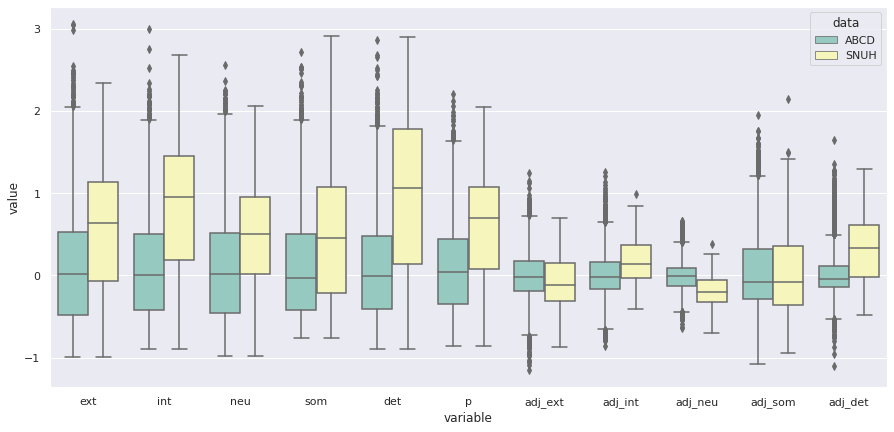

In [86]:
sns.set(style='darkgrid',palette='Set3')
plt.figure(figsize=(15,7))
sns.boxplot(x='variable',y='value',data=dataframe_melt,hue='data')
plt.show()
# sns.violinplot(x='variable',y='value',data=fs_df_melt,hue='data',split=True)

In [90]:
dataframe.loc[abcd_sbj_list,'adj_ext'].values

array([-0.22617674, -0.16560382,  0.23198674, ...,  0.6711841 ,
        0.30126657, -0.01484978])

In [93]:
np.savez("/data4/SNU/data/ABCD_CFA_5factor_adj.npz",
         adj_ext=dataframe.loc[abcd_sbj_list,'adj_ext'].values,
         adj_int=dataframe.loc[abcd_sbj_list,'adj_int'].values,
         adj_neu = dataframe.loc[abcd_sbj_list,'adj_neu'].values,
         adj_som = dataframe.loc[abcd_sbj_list,'adj_som'].values,
         adj_det= dataframe.loc[abcd_sbj_list,'adj_det'].values,
         scn=abcd_scanner)

In [94]:
np.savez("/data4/SNU/data/SNUH_CFA_5factor_adj.npz",
         adj_ext=dataframe.loc[snuh_sbj_list,'adj_ext'].values,
         adj_int=dataframe.loc[snuh_sbj_list,'adj_int'].values,
         adj_neu = dataframe.loc[snuh_sbj_list,'adj_neu'].values,
         adj_som = dataframe.loc[snuh_sbj_list,'adj_som'].values,
         adj_det= dataframe.loc[snuh_sbj_list,'adj_det'].values)

In [107]:
snuh_df = fs_df.loc[snuh_sbj_list,:]

In [112]:
for i in snuh_df.index:
    if 'C' in i:
        snuh_df.loc[i,"diag"] = 0
    else:
        snuh_df.loc[i,"diag"] = 1

In [147]:
input_=np.array(snuh_df[['ext','int','neu','som','det']])
target_ = snuh_df['diag']

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test = train_test_split(input_,target_, test_size=0.2, shuffle=True, stratify=target_)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((100, 5), (25, 5), (100,), (25,))

In [180]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.96

In [181]:
clf.predict(X_test)

array([1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0.])

In [182]:
y_test

subjectkey
P67    1.0
C55    0.0
C5     0.0
P53    1.0
P79    1.0
P14    1.0
C12    0.0
P8     1.0
P64    1.0
P81    1.0
P18    1.0
P66    1.0
P70    1.0
P49    1.0
C18    0.0
P71    1.0
C11    0.0
C19    0.0
P32    1.0
P85    1.0
C8     0.0
P48    1.0
P87    1.0
C51    0.0
C43    0.0
Name: diag, dtype: float64

In [183]:
clf.coef_

array([[-0.18120318,  1.43016674,  0.26146507, -0.0608018 ,  1.12090622]])